In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import folium                               # for create map
from folium.plugins import MarkerCluster

from sklearn.model_selection import train_test_split # for predection
from sklearn.linear_model import LinearRegression

In [2]:
# Load the data

locat_data = pd.read_csv("data/covid19-provinces_vn.csv")

In [3]:
# Display the first few rows of the data to understand its structure
locat_data.head()

,HASC,ISO,FIPS,Administration Code,Province,Infected,Active,Recovered,Deaths
0,VN.HI,HN,VM44,1,Ha Noi,945,407,518,20
1,VN.HG,3,VM50,2,Ha Giang,4,1,3,0
2,VN.CB,4,VM05,4,Cao Bang,0,0,0,0
3,VN.BK,53,VM72,6,Bac Kan,6,6,0,0
4,VN.TQ,7,VM68,8,Tuyen Quang,1,0,1,0


In [4]:
# Data Cleaning

# Check for any missing values
print(locat_data.isnull().sum())    


HASC                   0
ISO                    0
FIPS                   0
Administration Code    0
Province               0
Infected               0
Active                 0
Recovered              0
Deaths                 0
dtype: int64


In [5]:
# Trop the table not use

drop_table = ['HASC', 'ISO', 'FIPS', 'Administration Code']
covid_df = locat_data.drop(columns=drop_table, errors='ignore')

# Display the first few rows of the modified DataFrame to verify the columns are dropped
print(covid_df.head())

      Province  Infected  Active  Recovered  Deaths
0       Ha Noi       945     407        518      20
1     Ha Giang         4       1          3       0
2     Cao Bang         0       0          0       0
3      Bac Kan         6       6          0       0
4  Tuyen Quang         1       0          1       0


In [6]:
covid_df.describe()

,Infected,Active,Recovered,Deaths
count,63.000000,63.000000,63.000000,63.000000
mean,913.809524,772.460317,137.380952,3.904762
std,4376.782037,4234.300928,486.309089,16.342814
min,0.000000,0.000000,0.000000,0.000000
25%,19.000000,8.500000,4.500000,0.000000
50%,78.000000,47.000000,13.000000,0.000000
75%,265.000000,205.000000,50.000000,1.000000
max,34408.000000,33593.000000,3592.000000,123.000000


In [7]:
# describe info of data 

rounded_summary = covid_df.describe().round(decimals=0)
rounded_summary = rounded_summary.astype(int)

print(rounded_summary)


       Infected  Active  Recovered  Deaths
count        63      63         63      63
mean        914     772        137       4
std        4377    4234        486      16
min           0       0          0       0
25%          19       8          4       0
50%          78      47         13       0
75%         265     205         50       1
max       34408   33593       3592     123


In [8]:
# exploration and Vitualization data Covid-19 on Vietnam

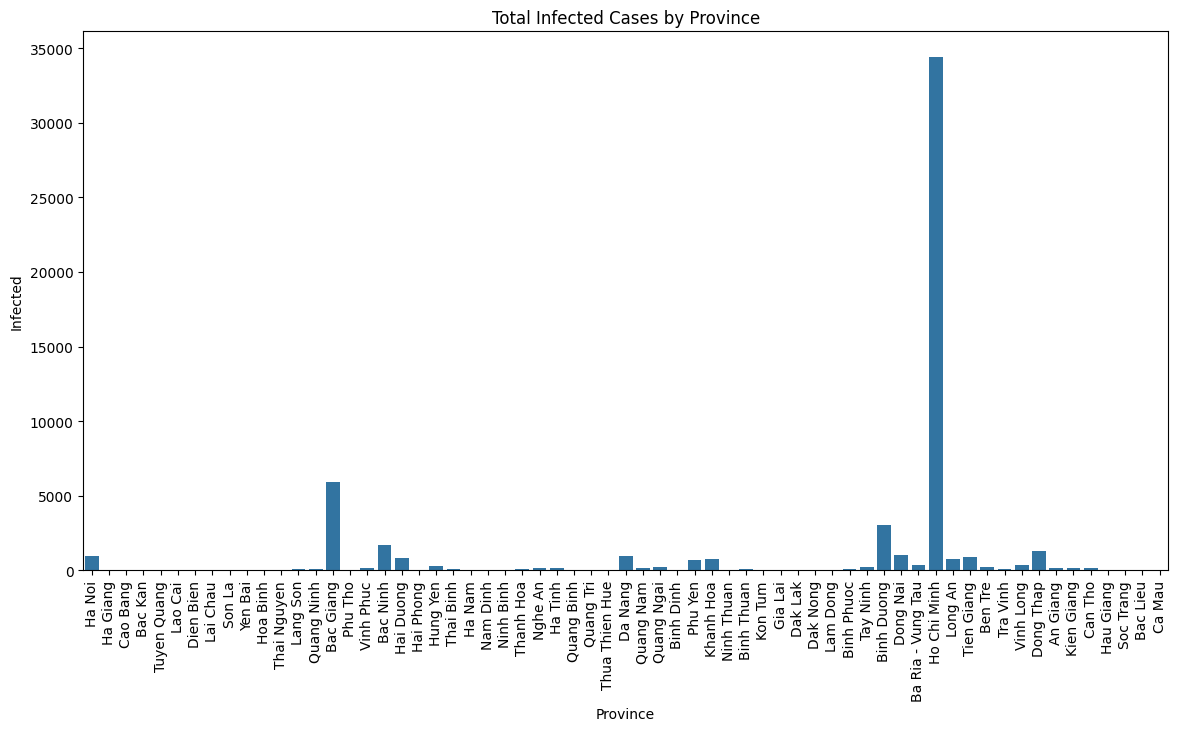

In [9]:
# province infected cases

plt.figure(figsize=(14, 7))
sns.barplot(x='Province', y='Infected', data = covid_df)
plt.xticks(rotation=90)
plt.title('Total Infected Cases by Province')
plt.show()
#print(covid_df[['Province', 'Infected']])


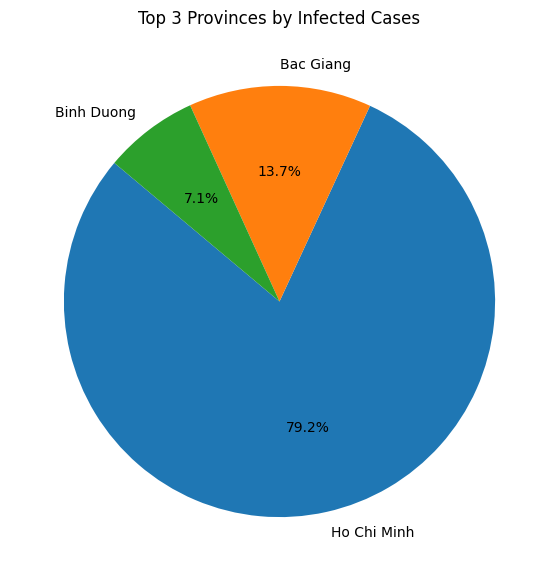

Average number of infected cases for the top 3 provinces = 14478


In [10]:
# Top 3 infected provinces

sorted_df = covid_df.sort_values(by='Infected', ascending=False)

# Select the top 3 provinces
top_3_provinces = sorted_df.head(3)

# Calculate the average number of infected cases for the top 3 provinces
average_infected_top_3 = top_3_provinces['Infected'].mean()

# Display the data in a pie chart
plt.figure(figsize=(10, 7))
plt.pie(top_3_provinces['Infected'], labels=top_3_provinces['Province'], autopct='%1.1f%%', startangle=140)
plt.title('Top 3 Provinces by Infected Cases')
plt.show()

# Print the average number of infected cases for the top 3 provinces
print("Average number of infected cases for the top 3 provinces =", int(average_infected_top_3))

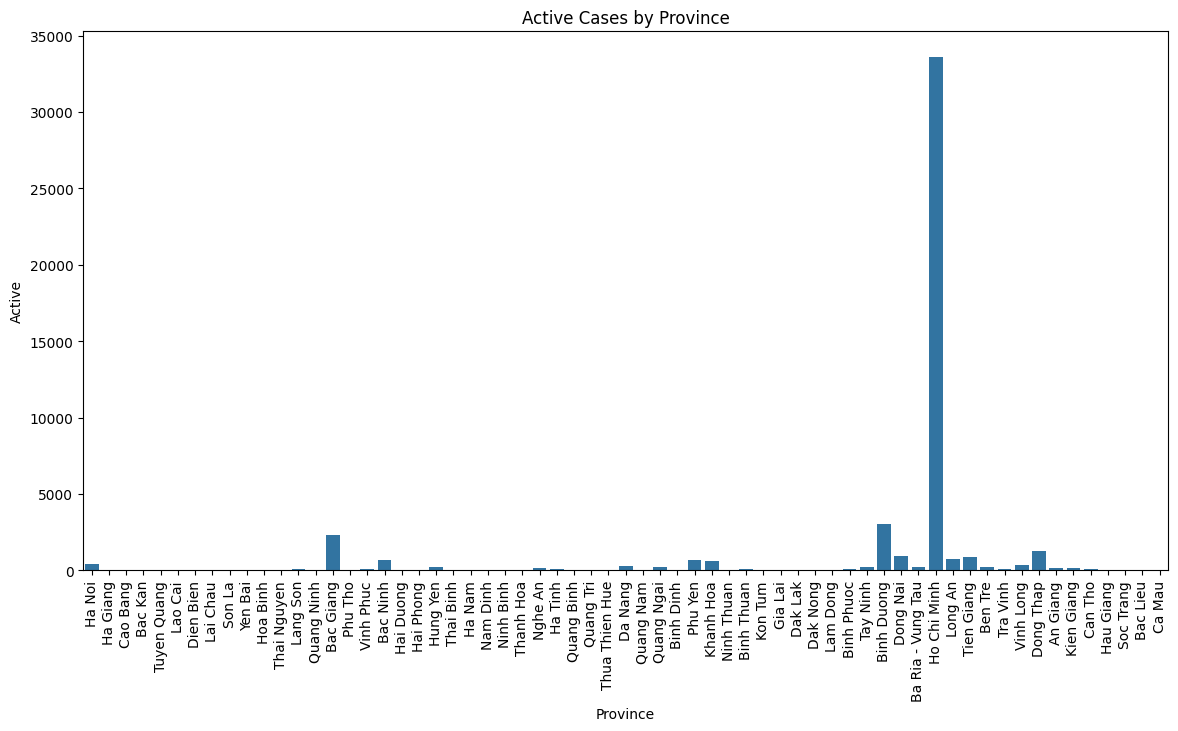

In [11]:
# active covid-19

plt.figure(figsize=(14, 7))
sns.barplot(x='Province', y='Active', data=covid_df)
plt.xticks(rotation=90)
plt.title('Active Cases by Province')
plt.show()
#print(covid_df[['Province', 'Active']])

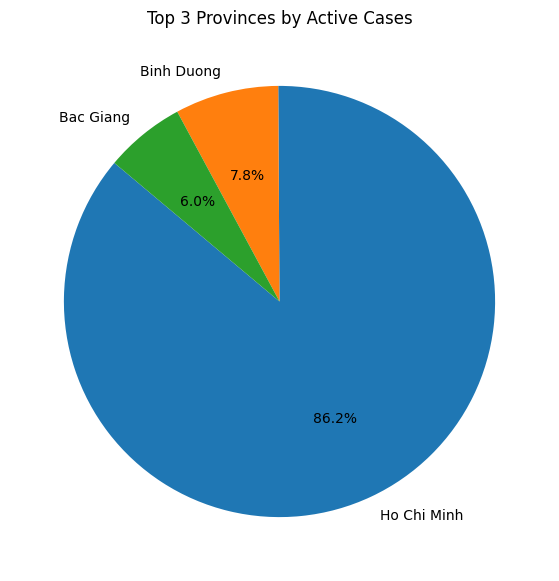

Average number of active cases for the top 3 provinces = 12989


In [12]:
# Top 3 infected provinces

active_df = covid_df.sort_values(by='Active', ascending=False)

# Select the top 3 provinces
top_3_provinces_active = active_df.head(3)

# Calculate the average number of active cases for the top 3 provinces
average_active_top_3 = top_3_provinces_active['Active'].mean()

# Display the data in a pie chart
plt.figure(figsize=(10, 7))
plt.pie(top_3_provinces_active['Active'], labels=top_3_provinces_active['Province'], autopct='%1.1f%%', startangle=140)
plt.title('Top 3 Provinces by Active Cases')
plt.show()

# Print the average number of active cases for the top 3 provinces
print("Average number of active cases for the top 3 provinces =", int(average_active_top_3))

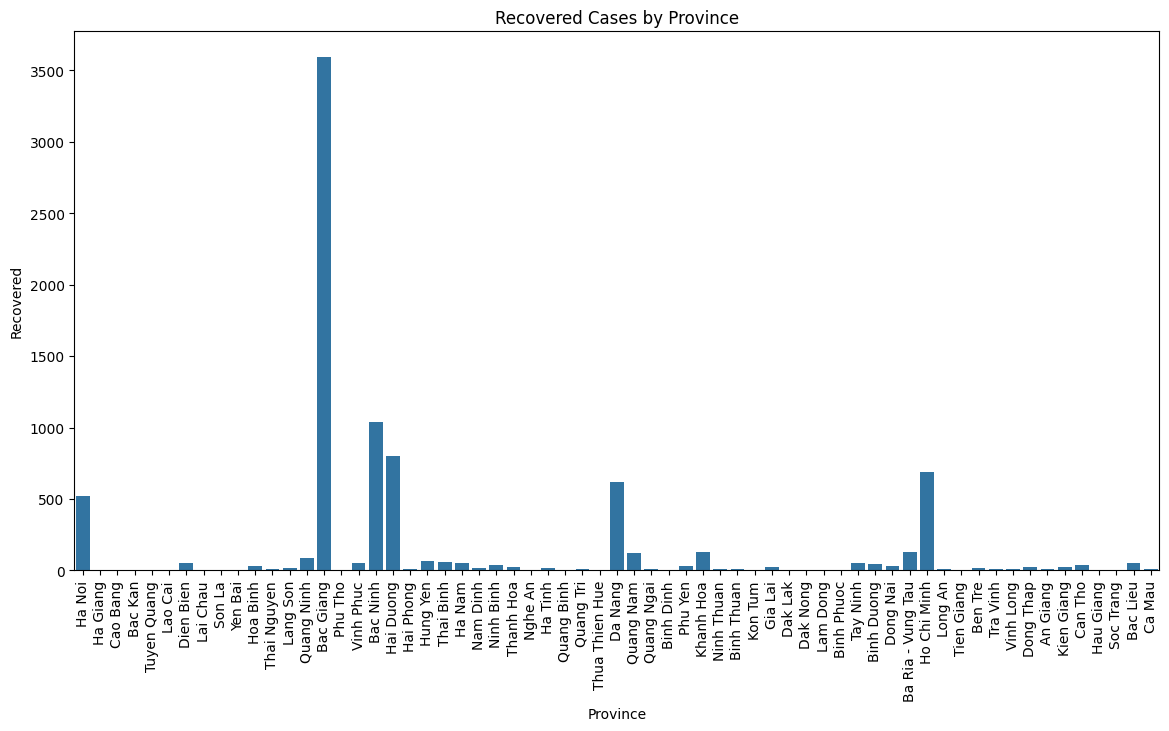

In [13]:
# recovered from covid-19 by province

plt.figure(figsize=(14, 7))
sns.barplot(x='Province', y='Recovered', data=covid_df)
plt.xticks(rotation=90)
plt.title('Recovered Cases by Province')
plt.show()
recovered = int(covid_df['Recovered'].mean())

#print("Average number of recovered :", recovered)


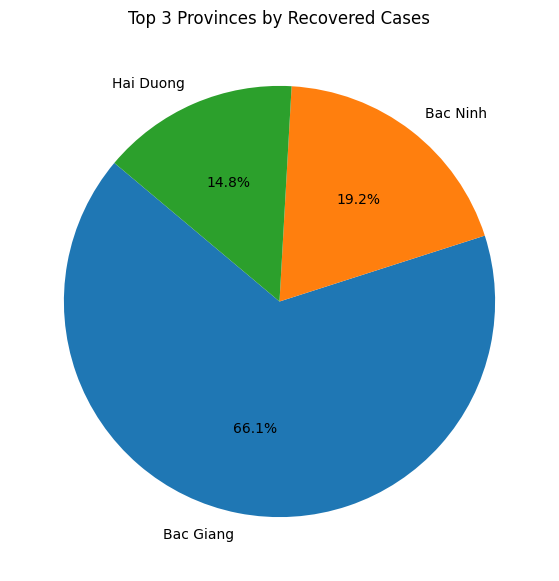

Average number of recovered cases for the top 3 provinces = 1812


In [14]:
covid_df['Recovered'] = pd.to_numeric(covid_df['Recovered'], errors='coerce')

# Sort the provinces by the number of recovered cases in descending order
sorted_df = covid_df.sort_values(by='Recovered', ascending=False)

# Select the top 3 provinces
top_3_provinces_recovered = sorted_df.head(3)

# Calculate the average number of recovered cases for the top 3 provinces
average_recovered_top_3 = top_3_provinces_recovered['Recovered'].mean()

# Display the data in a pie chart
plt.figure(figsize=(10, 7))
plt.pie(top_3_provinces_recovered['Recovered'], labels=top_3_provinces_recovered['Province'], autopct='%1.1f%%', startangle=140)
plt.title('Top 3 Provinces by Recovered Cases')
plt.show()

# Print the average number of recovered cases for the top 3 provinces
print("Average number of recovered cases for the top 3 provinces =", int(average_recovered_top_3))

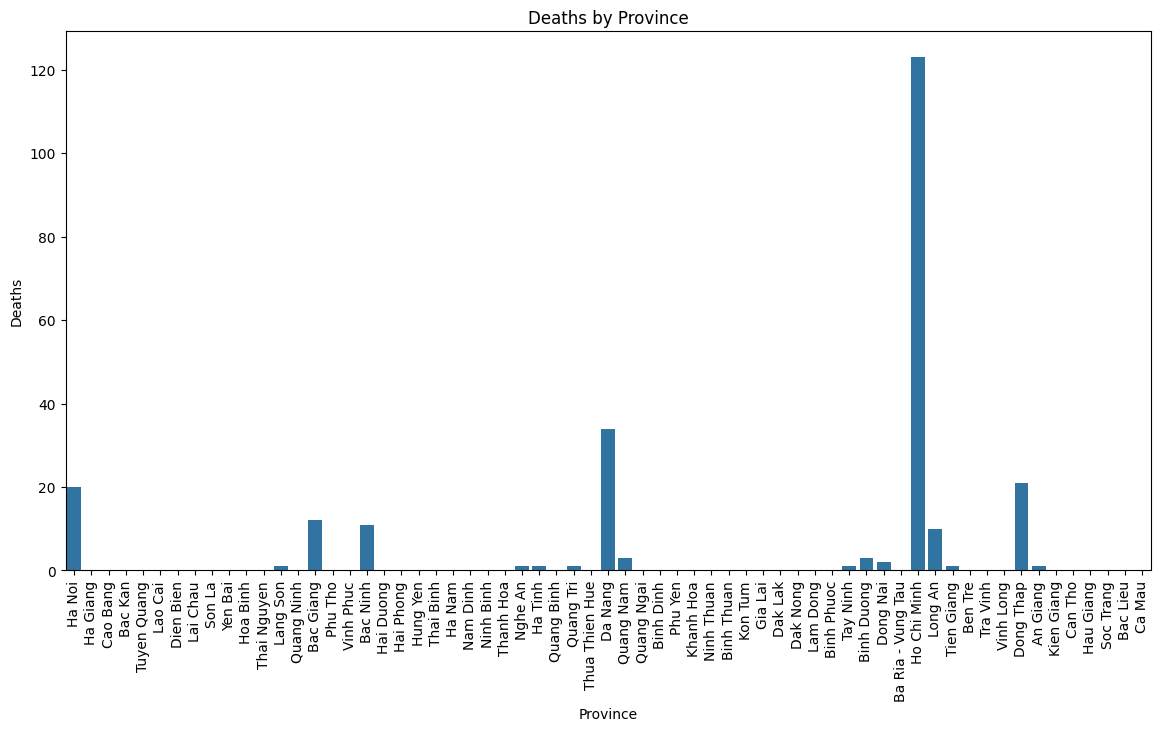

In [15]:
# death by province

plt.figure(figsize=(14, 7))
sns.barplot(x='Province', y='Deaths', data=covid_df)
plt.xticks(rotation=90)
plt.title('Deaths by Province')
plt.show()
#print(covid_df[['Province', 'Deaths']])

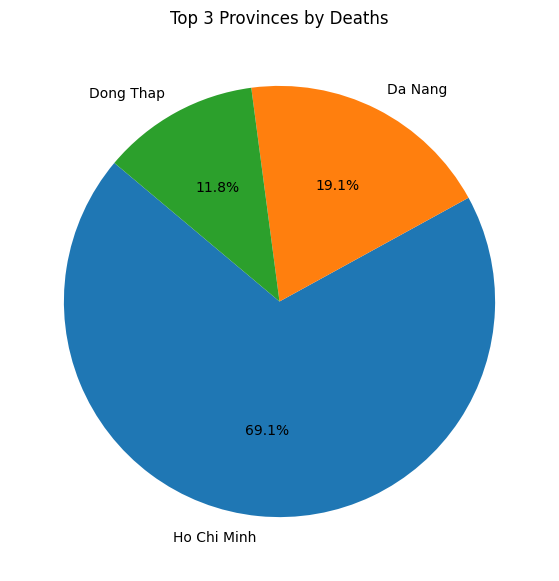

Average number of deaths for the top 3 provinces = 59


In [16]:
# Top 3 death provinces in Vietnam

covid_df['Deaths'] = pd.to_numeric(covid_df['Deaths'], errors='coerce')

# Sort the provinces by the number of deaths in descending order
sorted_df = covid_df.sort_values(by='Deaths', ascending=False)

# Select the top 3 provinces
top_3_provinces_deaths = sorted_df.head(3)

# Calculate the average number of deaths for the top 3 provinces
average_deaths_top_3 = top_3_provinces_deaths['Deaths'].mean()

# Display the data in a pie chart
plt.figure(figsize=(10, 7))
plt.pie(top_3_provinces_deaths['Deaths'], labels=top_3_provinces_deaths['Province'], autopct='%1.1f%%', startangle=140)
plt.title('Top 3 Provinces by Deaths')
plt.show()

# Print the average number of deaths for the top 3 provinces
print("Average number of deaths for the top 3 provinces =", int(average_deaths_top_3))

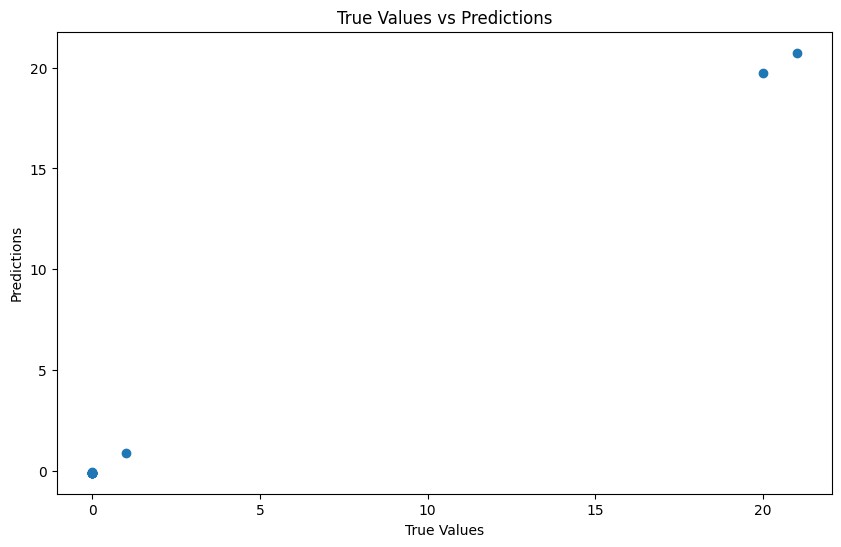

In [17]:
#--------predictions-----------phong_don-----

# Prepare the data
X = covid_df[['Infected', 'Active', 'Recovered']].values
y = covid_df['Deaths'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions')
plt.show()


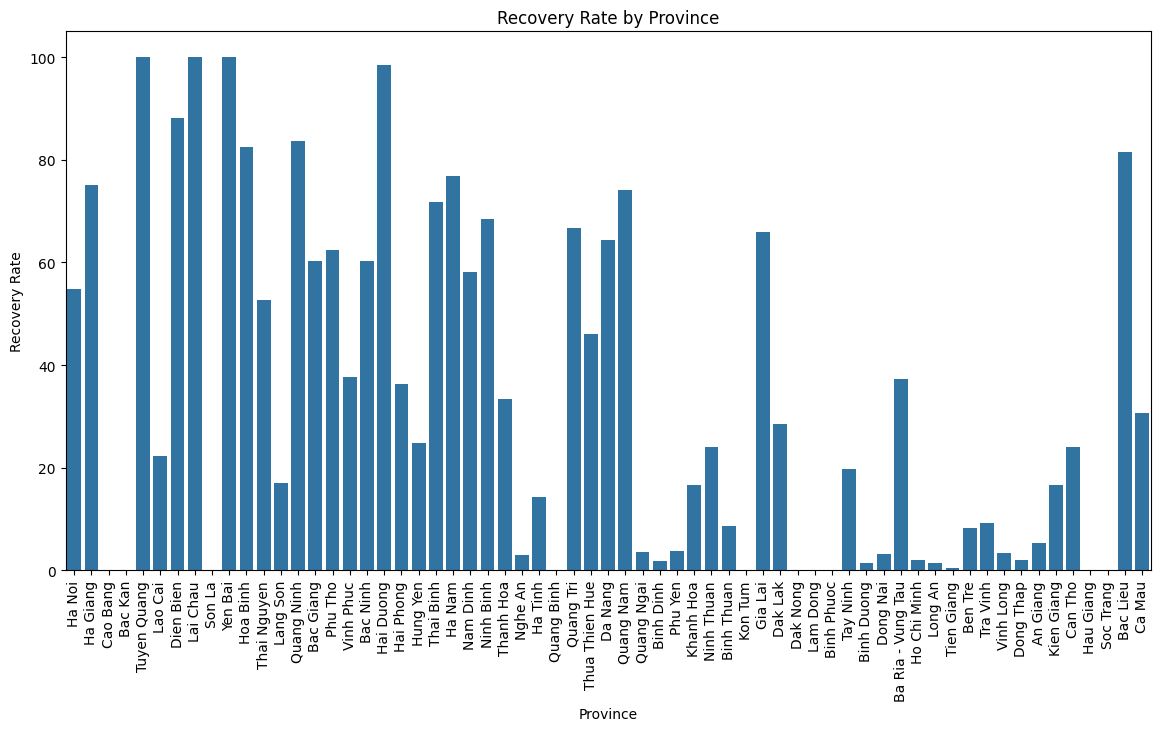

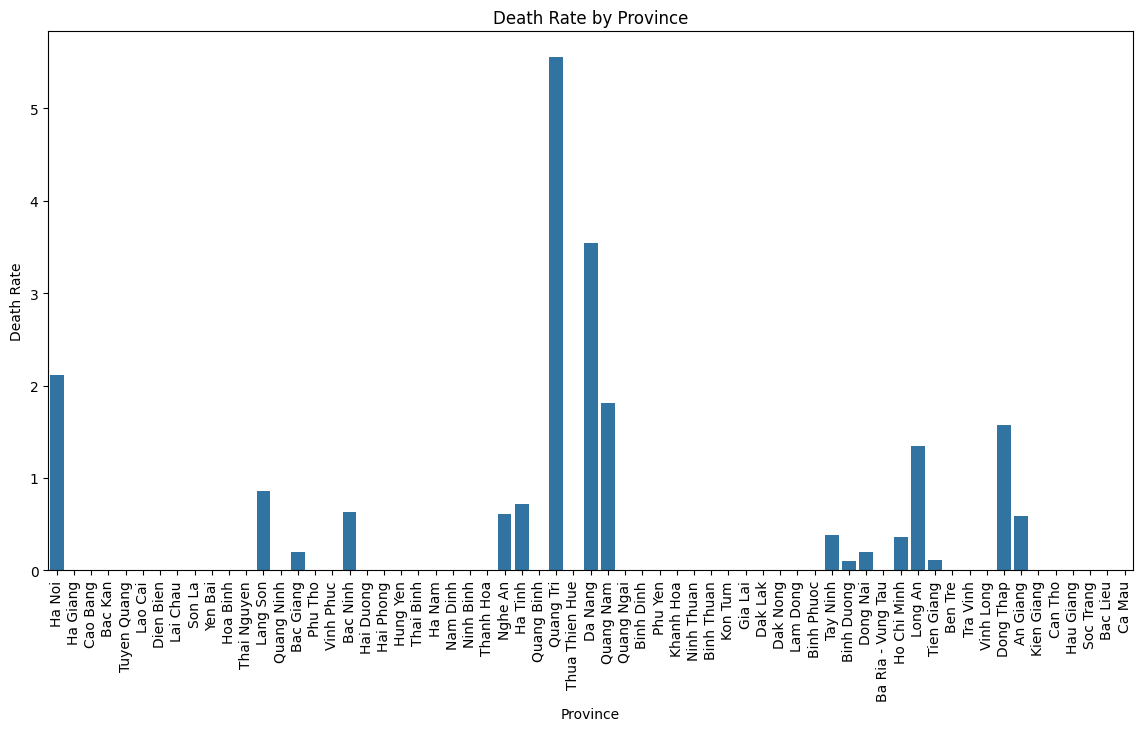

In [18]:
# Calculate Recovery and Death Rates: It calculates the recovery rate and death rate for each 

covid_df['Recovery Rate'] = covid_df['Recovered'] / covid_df['Infected'] * 100
covid_df['Death Rate'] = covid_df['Deaths'] / covid_df['Infected'] * 100

# Plot recovery rate
plt.figure(figsize=(14, 7))
sns.barplot(x='Province', y='Recovery Rate', data=covid_df)
plt.xticks(rotation=90)
plt.title('Recovery Rate by Province')
plt.show()

# Plot death rate
plt.figure(figsize=(14, 7))
sns.barplot(x='Province', y='Death Rate', data=covid_df)
plt.xticks(rotation=90)
plt.title('Death Rate by Province')
plt.show()



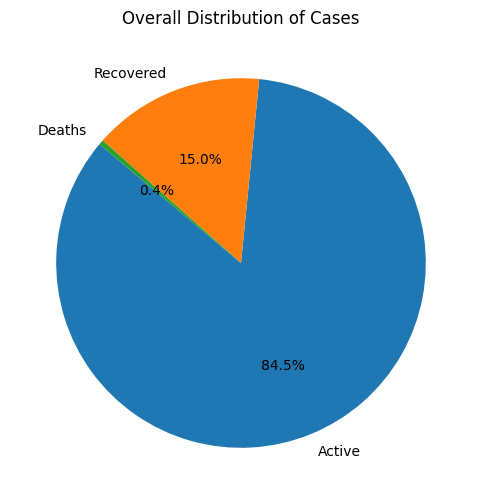

In [19]:
# Pie chart for the overall distribution of Active, Recovered, and Deaths

total_active = covid_df['Active'].sum()
total_recovered = covid_df['Recovered'].sum()
total_deaths = covid_df['Deaths'].sum()

plt.figure(figsize=(10, 6))
plt.pie([total_active, total_recovered, total_deaths], labels=['Active', 'Recovered', 'Deaths'], autopct='%1.1f%%', startangle=140)
plt.title('Overall Distribution of Cases')
plt.show()

In [20]:
# Maping by province in Vietnam

virtual_map = pd.DataFrame(covid_df)

# Latitude and longitude data for each province in Vietnam
latitude = [21.0285, 22.8235, 22.6667, 22.145, 21.8233, 22.3402, 21.3860, 22.3860, 21.3273, 21.7100, 20.8516, 21.5931, 21.7737, 20.9514, 21.2735, 21.4000, 21.3089, 21.0594, 20.9390, 20.8449, 20.6543, 20.4458, 20.5111, 20.4208, 20.25, 19.8075, 19.0824, 18.3451, 17.4689, 16.7406, 16.4550, 16.0544, 15.5394, 15.0806, 14.1667, 13.1891, 12.5674, 11.5753, 10.9956, 14.3507, 13.9836, 12.6670, 12.0072, 11.7501, 11.4808, 11.3525, 11.1767, 10.9457, 10.5417, 10.7629, 10.5364, 10.3688, 10.2431, 9.9313, 10.2564, 10.4712, 10.5216, 10.0120, 10.0371, 9.7878, 9.6033, 9.2941, 9.1830]
longitude = [105.8542, 104.7740, 106.0246, 105.8311, 104.9656, 104.4130, 103.3092, 103.2105, 103.8378, 104.8915, 105.3333, 105.8443, 105.4982, 106.3331, 106.0025, 105.5000, 105.8875, 106.0760, 106.3166, 106.6881, 106.0560, 106.3413, 106.3330, 106.2044, 105.9739, 106.2528, 105.7031, 105.8871, 106.6223, 107.1851, 107.5512, 108.2022, 108.0195, 108.6341, 108.9022, 109.3195, 109.1881, 108.9256, 108.2591, 108.0000, 108.0000, 108.0359, 107.7597, 108.3750, 106.9212, 106.1111, 106.6680, 106.8024, 107.2420, 106.6822, 106.4052, 106.3877, 106.3757, 106.3396, 105.9655, 105.6368, 105.1259, 105.0809, 105.7882, 105.4701, 105.9804, 105.7244, 105.1500]

# Create a map centered around Vietnam
map = folium.Map(location=[16.0471, 108.2062], zoom_start=6)

# Create a marker cluster
marker_cluster = MarkerCluster().add_to(map)

# Add markers to the map
for lat, lon, province, infected, active, recovered, deaths in zip(latitude, longitude, covid_df['Province'], covid_df['Infected'], covid_df['Active'], covid_df['Recovered'], covid_df['Deaths']):
    folium.Marker(
        location=[lat, lon],
        popup=f"<strong>{province}</strong><br>Infected: {infected}<br>Active: {active}<br>Recovered: {recovered}<br>Deaths: {deaths}",
        tooltip=province
    ).add_to(marker_cluster)

# Display the map
map


In [21]:
# Save the cleaned data
covid_df.to_csv('clan_data/cleaned_data.csv', index=False)